# Analysis of the difference between divorced and married couples?
Author: Md Rana Mahmud

<meta name="Md Rana Mahmud" content="John Doe">

# Table of Contents:
* [Business Understanding](#business)
* [Data Understanding](#data)
* [Data Preparation](#data-preperation)
* [Modeling](#modeling)
* [Evaluation](#evaluation)
* [Deployment](#deployment)
* [Analysis, Modeling, Visualization](#analysis)
    1. [Is there a significant difference between Happily Married and Divorced couples?](#q1)
    2. [What are the most agreed and disagreed things between the couples?](#q2)
    3. [What couples need to focus most to prevent divorce?](#q3)
    4. [How accurately we can predict a future divorce?](#q4)

In [440]:
# load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from itertools import islice
from textwrap import TextWrapper
# library to to independent sample t test
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from tpot import TPOTClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.svm import LinearSVC
from collections import Counter
%matplotlib inline

1: E999 SyntaxError: invalid syntax


# Business Understanding <a class="anchor" id="business"></a>

Problem Overview

Yöntem and İlhan (2017, 2018)  developed the Divorce Predictors Scale based on  Gottman
couples therapy (Gottman, 2014; Gottman and Gottman, 2012). Using this scale they've done divorce prediction in their research paper.
Gottman couples therapy explains the causes of divorce based on empirical research. In this analysis, we'll try to gain some insight between happily married and divorced couples based on the following questions. Yöntem and İlhan (2017, 2018) collected the data from 7 regions of Turkey. In this data out of 170 couples 84 (49.41%) were divorced and 86 (50.59%) were
married couples.

In this project I was interested in using Divorce Predictors data set to find out the answer to the following questions:
    1. Is there a significant difference between Happily Married and Divorced couples?
    2. What are the most agreed and disagreed things between the couples?
    3. What couples need to focus most to prevent divorce?
    4. How accurately we can predict a future divorce?

# Data

## Data Understanding <a class="anchor" id="data"></a>

In [441]:
# load the data
df = pd.read_excel("divorce.xlsx")
# print first few rows of the data
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [442]:
# check data types
df.dtypes

Atr1     int64
Atr2     int64
Atr3     int64
Atr4     int64
Atr5     int64
Atr6     int64
Atr7     int64
Atr8     int64
Atr9     int64
Atr10    int64
Atr11    int64
Atr12    int64
Atr13    int64
Atr14    int64
Atr15    int64
Atr16    int64
Atr17    int64
Atr18    int64
Atr19    int64
Atr20    int64
Atr21    int64
Atr22    int64
Atr23    int64
Atr24    int64
Atr25    int64
Atr26    int64
Atr27    int64
Atr28    int64
Atr29    int64
Atr30    int64
Atr31    int64
Atr32    int64
Atr33    int64
Atr34    int64
Atr35    int64
Atr36    int64
Atr37    int64
Atr38    int64
Atr39    int64
Atr40    int64
Atr41    int64
Atr42    int64
Atr43    int64
Atr44    int64
Atr45    int64
Atr46    int64
Atr47    int64
Atr48    int64
Atr49    int64
Atr50    int64
Atr51    int64
Atr52    int64
Atr53    int64
Atr54    int64
Class    int64
dtype: object

In [443]:
# check percentages of missing values
df.isnull().mean()

Atr1     0.0
Atr2     0.0
Atr3     0.0
Atr4     0.0
Atr5     0.0
Atr6     0.0
Atr7     0.0
Atr8     0.0
Atr9     0.0
Atr10    0.0
Atr11    0.0
Atr12    0.0
Atr13    0.0
Atr14    0.0
Atr15    0.0
Atr16    0.0
Atr17    0.0
Atr18    0.0
Atr19    0.0
Atr20    0.0
Atr21    0.0
Atr22    0.0
Atr23    0.0
Atr24    0.0
Atr25    0.0
Atr26    0.0
Atr27    0.0
Atr28    0.0
Atr29    0.0
Atr30    0.0
Atr31    0.0
Atr32    0.0
Atr33    0.0
Atr34    0.0
Atr35    0.0
Atr36    0.0
Atr37    0.0
Atr38    0.0
Atr39    0.0
Atr40    0.0
Atr41    0.0
Atr42    0.0
Atr43    0.0
Atr44    0.0
Atr45    0.0
Atr46    0.0
Atr47    0.0
Atr48    0.0
Atr49    0.0
Atr50    0.0
Atr51    0.0
Atr52    0.0
Atr53    0.0
Atr54    0.0
Class    0.0
dtype: float64

There are no missing values in the data and all the data are numeric and in integer format.

### Shape of data

In [444]:
# print shape of the data
print(df.shape)

(170, 55)


In [445]:
# check value counts of the attributes
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [446]:
# print column names
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

This data 55 variable and 170 observations. Variable Atr1 to Atr54 are questions asked to the couples and Class indicates whether they're divorced or not.

## Data Preparation <a class="anchor" id="data-preperation"></a>

In [447]:
# first we'll create a dictionary of the original questions
questions = "1. If one of us apologizes when our discussion deteriorates,\
the discussion ends. 2. I know we can ignore our differences, even if things \
get hard sometimes. 3. When we need it, we can take our discussions with my \
spouse from the beginning and correct it. 4. When I discuss with my spouse,\
to contact him will eventually work.\
5. The time I spent with my wife is special for us.\
6. We don\'t have time at home as partners.\
7. We are like two strangers who share the same environment at home rather\
than family. 8. I enjoy our holidays with my wife.\
9. I enjoy traveling with my wife.\
10. Most of our goals are common to my spouse.\
11. I think that one day in the future, when I look back,\
I see that my spouse and I have been in harmony with each other.\
12. My spouse and I have similar values in terms of personal freedom.\
13. My spouse and I have similar sense of entertainment.\
14. Most of our goals for people (children, friends, etc.) are the same.\
15. Our dreams with my spouse are similar and harmonious.\
16. We\'re compatible with my spouse about what love should be.\
17. We share the same views about being happy in our life with my spouse\
18. My spouse and I have similar ideas about how marriage should be\
19. My spouse and I have similar ideas about how roles should be in marriage\
20. My spouse and I have similar values in trust.\
21. I know exactly what my wife likes.\
22. I know how my spouse wants to be taken care of when she/he sick.\
23. I know my spouse\'s favorite food.\
24. I can tell you what kind of stress my spouse is facing in her/his life.\
25. I have knowledge of my spouse\'s inner world.\
26. I know my spouse\'s basic anxieties.\
27. I know what my spouse\'s current sources of stress are.\
28. I know my spouse\'s hopes and wishes.\
29. I know my spouse very well.\
30. I know my spouse\'s friends and their social relationships.\
31. I feel aggressive when I argue with my spouse.\
32. When discussing with my spouse, I usually use expressions such as \
‘you always’ or ‘you never’ .\
33. I can use negative statements about my spouse\'s personality \
during our discussions.\
34. I can use offensive expressions during our discussions.\
35. I can insult my spouse during our discussions.\
36. I can be humiliating when we discussions.\
37. My discussion with my spouse is not calm.\
38. I hate my spouse\'s way of open a subject.\
39. Our discussions often occur suddenly.\
40. We\'re just starting a discussion before I know what\'s\
going on.\
41. When I talk to my spouse about something, my calm suddenly breaks.\
42. When I argue with my spouse, ı only go out and I don\'t say a word.\
43. I mostly stay silent to calm the environment a little bit.\
44. Sometimes I think it\'s good for me to leave home for a while.\
45. I\'d rather stay silent than discuss with my spouse.\
46. Even if I\'m right in the discussion, I stay silent to hurt my spouse.\
47. When I discuss with my spouse, I stay silent because I am afraid of \
not being able to control my anger.\
48. I feel right in our discussions.\
49. I have nothing to do with what I\'ve been accused of.\
50. I\'m not actually the one who\'s guilty about what I'm accused of.\
51. I\'m not the one who\'s wrong about problems at home.\
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.\
53. When I discuss, I remind my spouse of her/his inadequacy.\
54. I\'m not afraid to tell my spouse about her/his incompetence."

In [448]:
# split the string by number
questions = re.split(r"[0-9]{1,2}.", questions)
questions

['',
 ' If one of us apologizes when our discussion deteriorates,the discussion ends. ',
 ' I know we can ignore our differences, even if things get hard sometimes. ',
 ' When we need it, we can take our discussions with my spouse from the beginning and correct it. ',
 ' When I discuss with my spouse,to contact him will eventually work.',
 ' The time I spent with my wife is special for us.',
 " We don't have time at home as partners.",
 ' We are like two strangers who share the same environment at home ratherthan family. ',
 ' I enjoy our holidays with my wife.',
 ' I enjoy traveling with my wife.',
 ' Most of our goals are common to my spouse.',
 ' I think that one day in the future, when I look back,I see that my spouse and I have been in harmony with each other.',
 ' My spouse and I have similar values in terms of personal freedom.',
 ' My spouse and I have similar sense of entertainment.',
 ' Most of our goals for people (children, friends, etc.) are the same.',
 ' Our dreams with 

In [449]:
# Trim whitespace and drop empty string
questions = [question.strip() for question in questions if question != ""]
# print first five questions
print(questions[1:5])
# check the nubmer of questions
print(len(questions))

['I know we can ignore our differences, even if things get hard sometimes.', 'When we need it, we can take our discussions with my spouse from the beginning and correct it.', 'When I discuss with my spouse,to contact him will eventually work.', 'The time I spent with my wife is special for us.']
54


In [450]:
# make titles text wrap
tw = TextWrapper()
# set width to break lines
tw.width = 40
questions = ["\n".join(tw.wrap(text)) for text in questions]

In [451]:
# make column names lowercase
df.columns = map(str.lower, df.columns)

In [452]:
# make a dictionary of questions and variable names
quetions_list = dict(zip(df.columns, questions))

In [453]:
# print first few questions
list(islice(quetions_list.items(),3))

[('atr1',
  'If one of us apologizes when our\ndiscussion deteriorates,the discussion\nends.'),
 ('atr2',
  'I know we can ignore our differences,\neven if things get hard sometimes.'),
 ('atr3',
  'When we need it, we can take our\ndiscussions with my spouse from the\nbeginning and correct it.')]

2:34: E231 missing whitespace after ','


In [454]:
# print married and divorced couple frequency
df["class"].value_counts()

0    86
1    84
Name: class, dtype: int64

In [455]:
# assign label to class variable
df['class'] = df["class"].map({0: "Married",  1: "Divorced"})

Now we'll recode the values of the variables 0-4 scale to -2 to 2 to make the scale bipolar.

In [456]:
df.head()

,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,atr10,...,atr46,atr47,atr48,atr49,atr50,atr51,atr52,atr53,atr54,class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,Divorced
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,Divorced
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,Divorced
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,Divorced
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,Divorced


In [457]:
# # add class
# df_new['class'] = df['class']

Married     50.59
Divorced    49.41
Name: class, dtype: float64


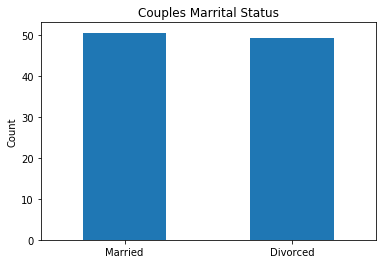

In [458]:
percent = df["class"].value_counts()/df["class"].count()*100
percent = np.round(percent, 2)
print(percent)
# make barplot of married vs divorced
percent.plot(kind='bar')
plt.title("Couples Marrital Status")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

From the above we can see that the data set is balanced and there are 50.59% Married and 49.41% divorced couples in the data.

# Analysis, Modeling, Visualization <a class="anchor" id="analysis"></a>



## Question 1 <a class="anchor" id="q1"></a>
1. Are there significant difference between Happily Married and Divorced couples?

In [459]:
# calculate average value of the questions for both category of couplse
df_mean = df.groupby(['class']).mean()


In [460]:
# print the average score
df_mean

,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,atr10,...,atr45,atr46,atr47,atr48,atr49,atr50,atr51,atr52,atr53,atr54
class,,,,,,,,,,,,,,,,,,,,,
Divorced,3.190476,2.869048,2.916667,2.726190,3.011905,1.130952,0.988095,2.809524,2.892857,2.773810,...,3.285714,3.166667,3.321429,3.452381,3.511905,3.500000,3.357143,3.488095,3.321429,3.369048
Married,0.395349,0.465116,0.639535,0.267442,0.104651,0.372093,0.011628,0.127907,0.058140,0.406977,...,1.651163,1.953488,1.244186,2.046512,1.279070,1.383721,1.616279,1.569767,1.186047,0.686047


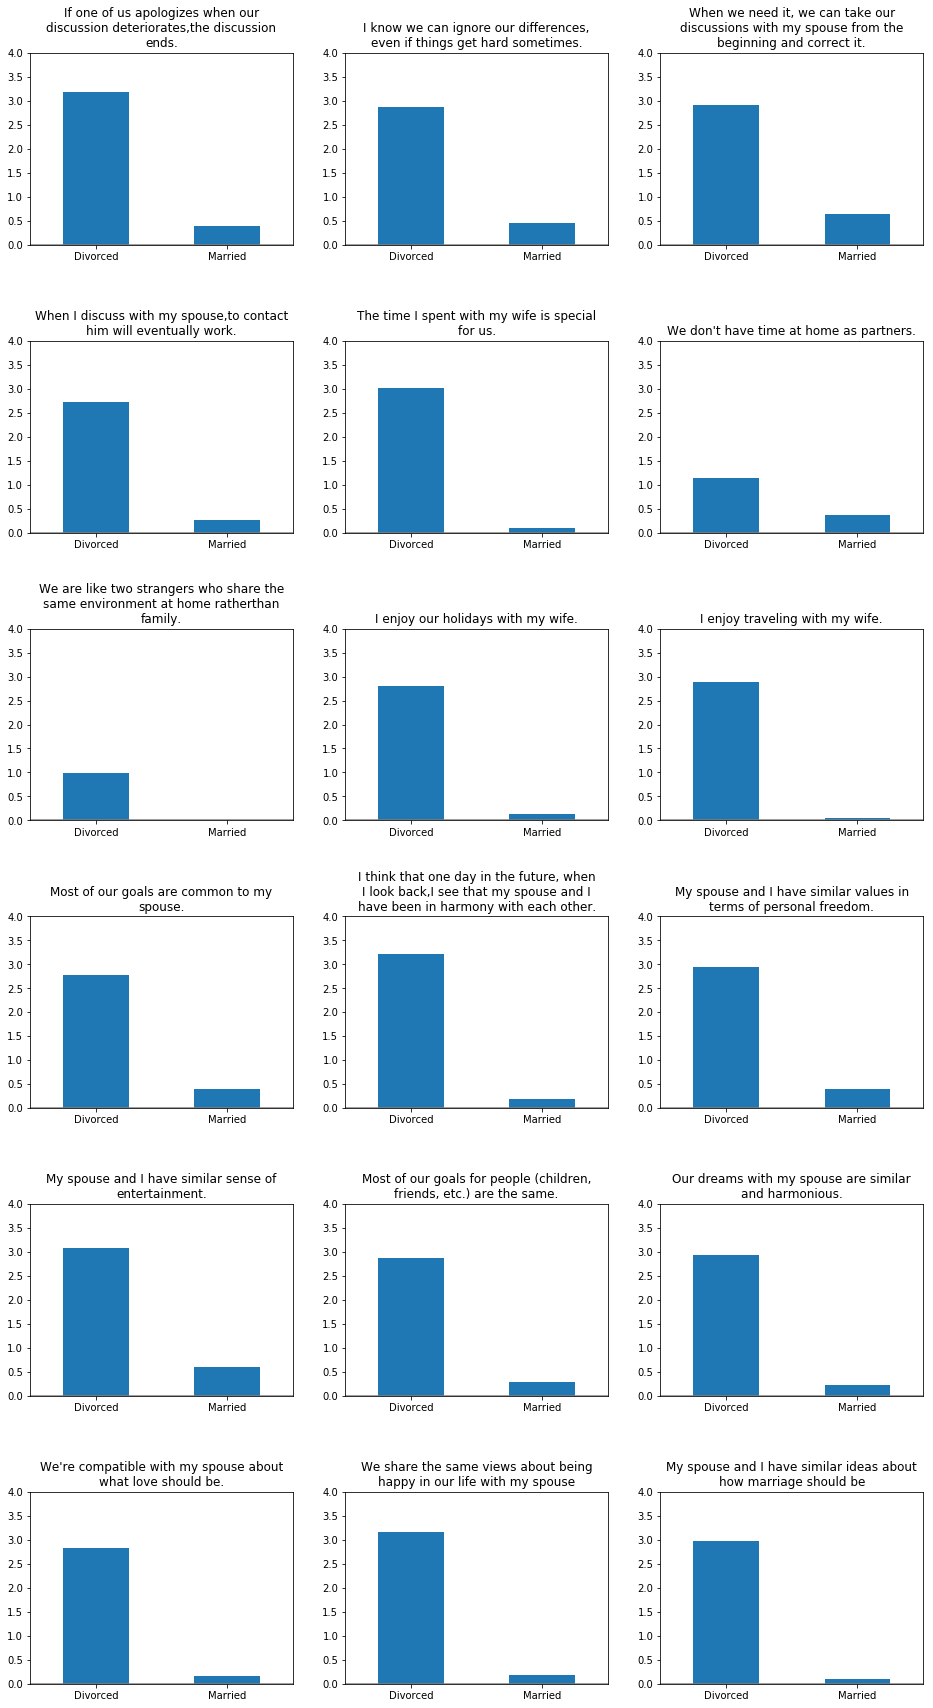

In [461]:
# print the average values to see the differences in questions
fig, axs = plt.subplots(6, 3, figsize=[16, 30])

# make plots of all the variables
for num in range(1, 19):
    plt.subplot(6, 3, num)
    plt.subplots_adjust(hspace=0.5)
    axs = df_mean[df.columns[num-1]].plot(kind='bar')
    plt.title(quetions_list[df.columns[num-1]])
    plt.xticks(rotation=0)
    plt.xlabel("")
#     plt.ylabel("Disagree\t\tNeutral\t\t\t  Agree".expandtabs())
    plt.ylim(0, 4)
    plt.axhline(y=0, color='gray', linestyle='-')
plt.show()

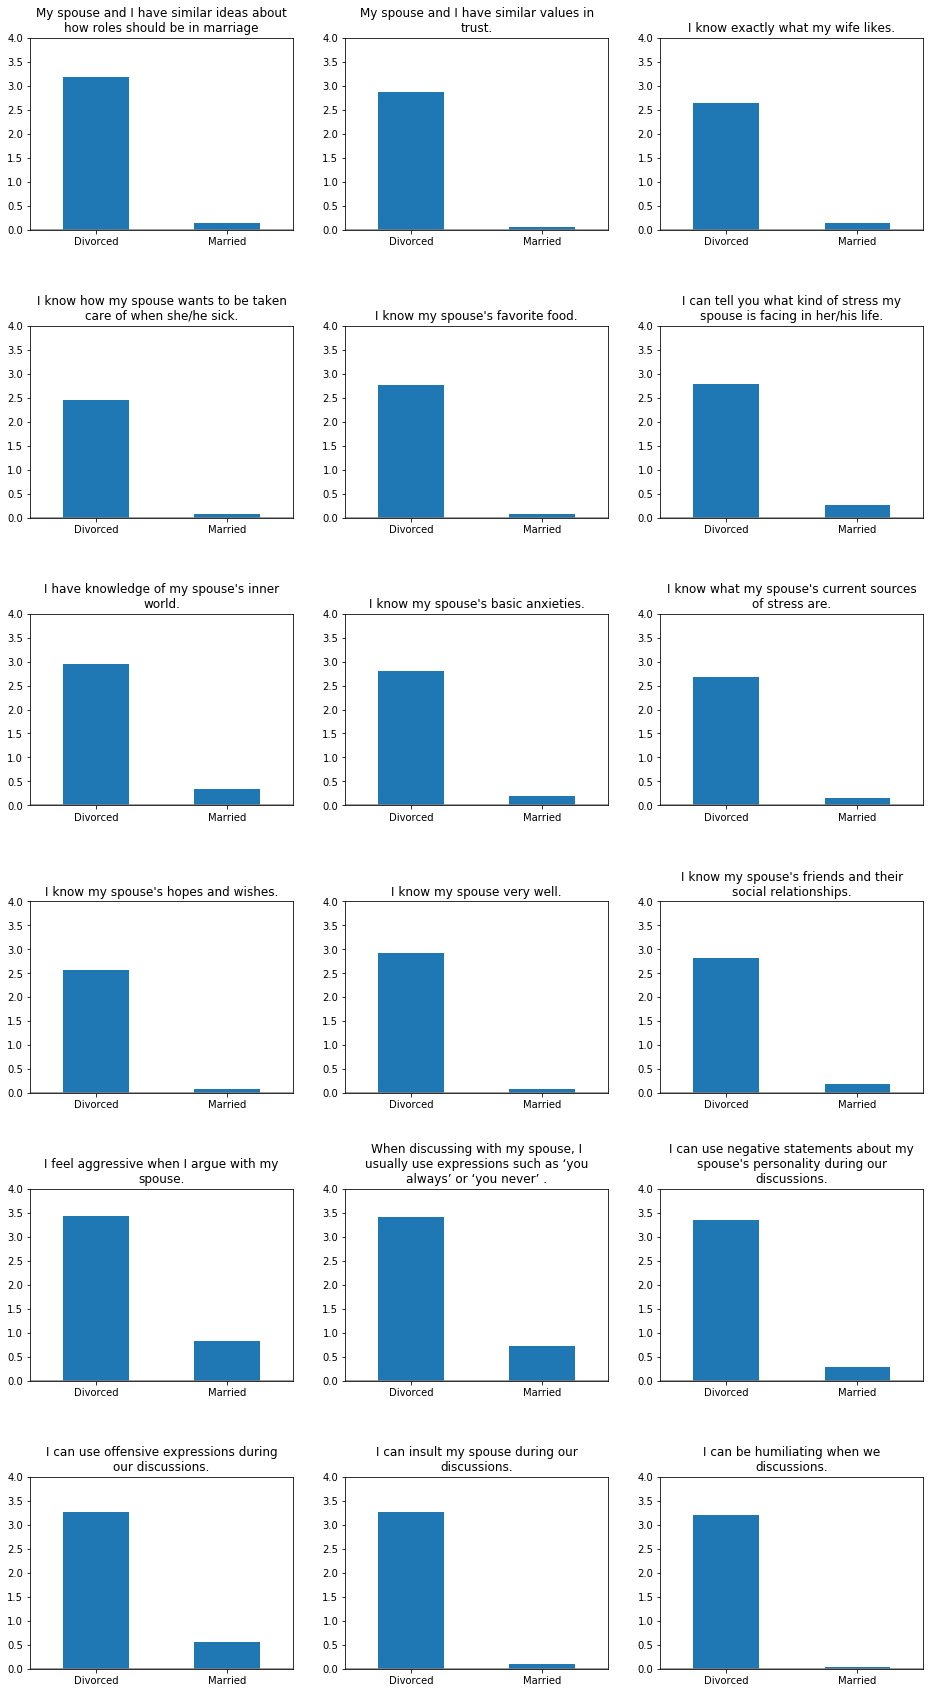

In [462]:
fig, axs = plt.subplots(6, 3, figsize=[16, 30])

for num in range(18, 36):
    plot_location = num % 18+1
    plt.subplot(6, 3, plot_location)
    plt.subplots_adjust(hspace=0.5)
    axs = df_mean[df.columns[num]].plot(kind='bar')
    plt.title(quetions_list[df.columns[num]])
    plt.xticks(rotation=0)
    plt.xlabel("")
    plt.ylim(0, 4)
    plt.axhline(y=0, color='gray', linestyle='-')
plt.show()

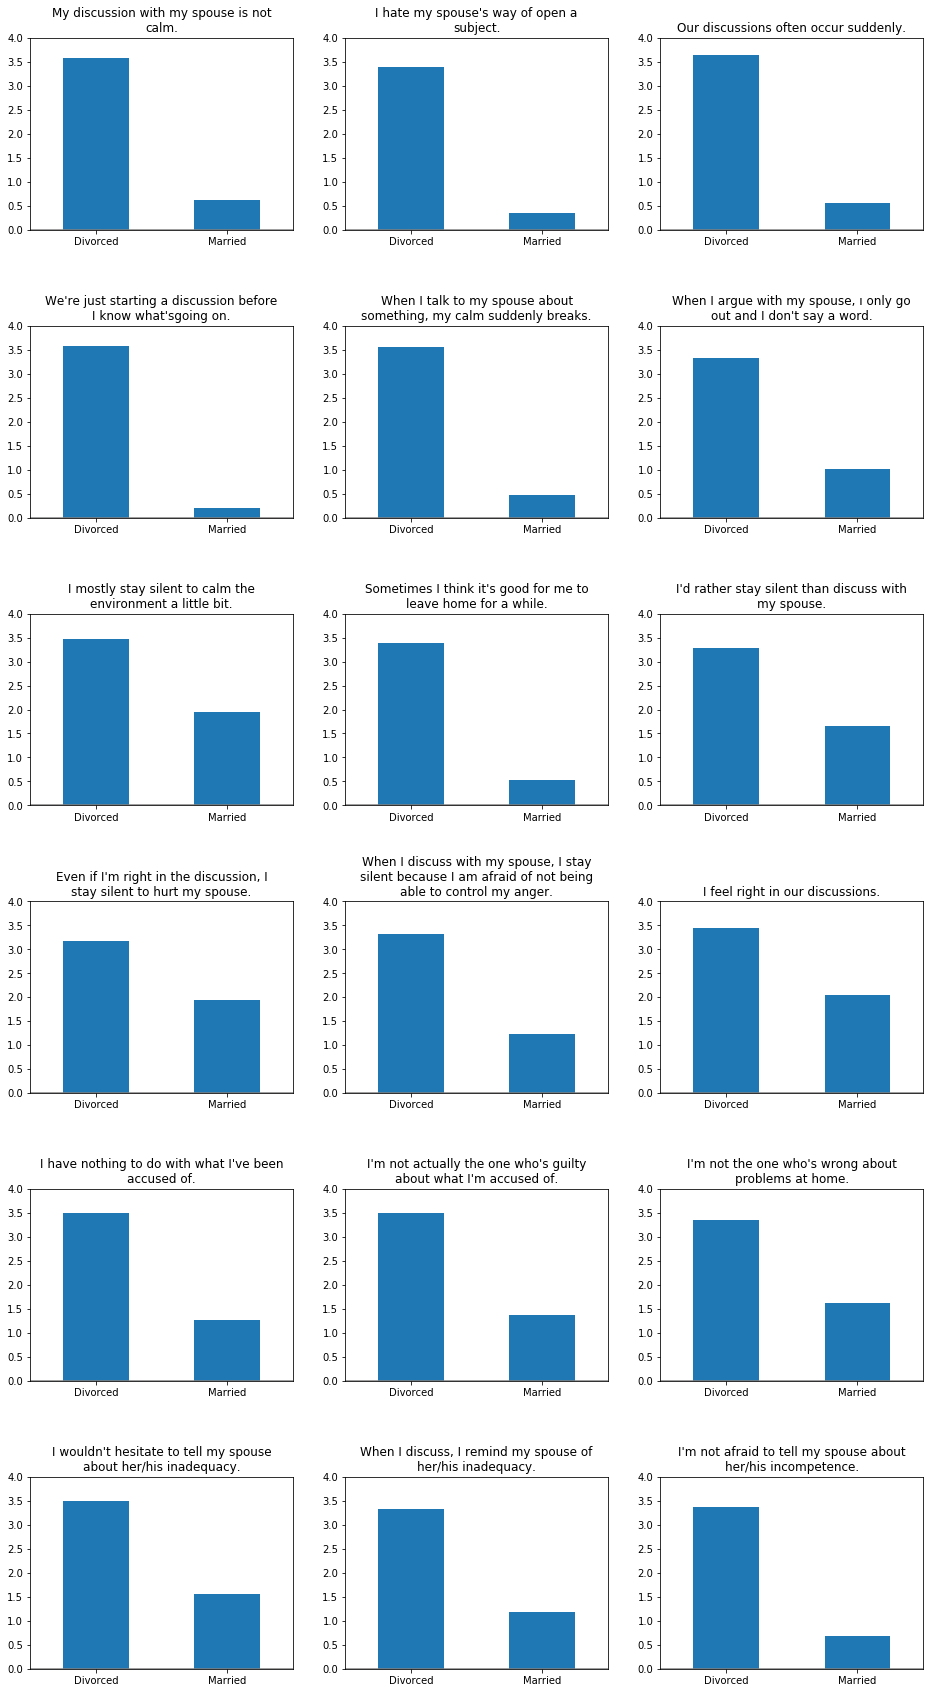

In [463]:
fig, axs = plt.subplots(6, 3, figsize=[16, 30])

for num in range(36, 54):
    plot_location = num % 18+1
    plt.subplot(6, 3, plot_location)
    plt.subplots_adjust(hspace=0.5)
    axs = df_mean[df.columns[num]].plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title(quetions_list[df.columns[num]])
    plt.xlabel("")
    plt.ylim(0, 4)
    plt.axhline(y=0, color='gray', linestyle='-')
plt.show()

Among the 54 questions married and divorced both couples on average gave a similar opinion about having time at home for partners, feeling right in their discussions.
In all other 52 questions, their average responses were in opposite directions.

In [464]:
df_mean

,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,atr10,...,atr45,atr46,atr47,atr48,atr49,atr50,atr51,atr52,atr53,atr54
class,,,,,,,,,,,,,,,,,,,,,
Divorced,3.190476,2.869048,2.916667,2.726190,3.011905,1.130952,0.988095,2.809524,2.892857,2.773810,...,3.285714,3.166667,3.321429,3.452381,3.511905,3.500000,3.357143,3.488095,3.321429,3.369048
Married,0.395349,0.465116,0.639535,0.267442,0.104651,0.372093,0.011628,0.127907,0.058140,0.406977,...,1.651163,1.953488,1.244186,2.046512,1.279070,1.383721,1.616279,1.569767,1.186047,0.686047


<Figure size 1152x864 with 0 Axes>

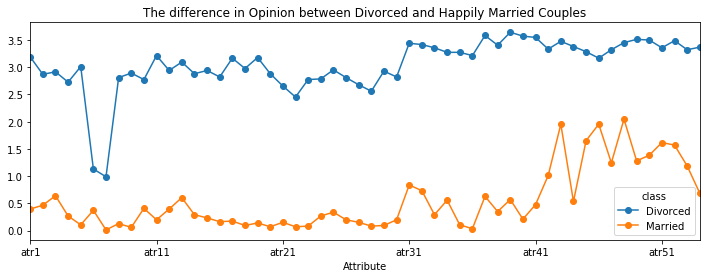

9:43: E231 missing whitespace after ','


In [465]:
figure = plt.gcf()
plt.rcParams['figure.figsize'] = 12, 4
df_mean.T.plot(marker='o')
plt.title("The difference in Opinion between \
Divorced and Happily Married Couples")
plt.xlabel("Attribute")
figure.set_size_inches(16, 12)
plt.savefig("Difference in Opinion between \
Divorced and Happiliy Married Couples.png",bbox_inches='tight', dpi=300)

###  Tests between two groups

As the features and class variables are both categorical for all questions asked here we'll now do chi-square tests of independence to see the statistical difference.

For all the tests the hypothesis will be

$Null Hypothesis_{i}$: There is no difference between the divorced and happily married couple for ith question
    
$Alternative Hypothesis_{i}$: There is a significant difference between the divorced and happily married couple for ith question

In [466]:
t_test_results = []
for column in df.columns[:-1]:
    divorced = df.loc[df['class'] == "Divorced", column]
    married = df.loc[df['class'] == "Married", column]
    t_statistic, p_value = ttest_ind(divorced, married)
    t_test_results.append(p_value < 0.05/0.54)
t_test_results
Counter(t_test_results)

Counter({True: 54})

At a 5% level of significance using Bonferroni corrections for multiple t tests since all the p values are less than 0.05/54 we reject all the hypotheses and conclude that between married and divorced couples there exists a significant difference for all the questions. 

**Conclusion:** From the above analysis we can say that there exists a significant difference between happily married and divorced couples.

## Question 2 <a class="anchor" id="q2"></a>
2. What are the most agreed and disagreed things between the couples?

In [467]:
# calculate average value between two groups
df_mean_orig = df.groupby(['class']).mean()

In [468]:
# assign column names
df_mean_orig.columns = quetions_list.values()

In [469]:
# transpose the data
df_mean_orig = df_mean_orig.T

In [470]:
# calculate difference score in opinion
df_mean_orig['difference'] = df_mean_orig['Divorced'] - df_mean_orig['Married'] 

In [471]:
df_mean_orig.sort_values(['difference'], ascending=False)

class,Divorced,Married,difference
We're just starting a discussion before\nI know what'sgoing on.,3.571429,0.209302,3.362126
I can be humiliating when we\ndiscussions.,3.214286,0.034884,3.179402
I can insult my spouse during our\ndiscussions.,3.273810,0.104651,3.169158
Our discussions often occur suddenly.,3.642857,0.569767,3.073090
"When I talk to my spouse about\nsomething, my calm suddenly breaks.",3.547619,0.476744,3.070875
I can use negative statements about my\nspouse's personality during our\ndiscussions.,3.357143,0.290698,3.066445
I hate my spouse's way of open a\nsubject.,3.404762,0.348837,3.055925
My spouse and I have similar ideas about\nhow roles should be in marriage,3.178571,0.139535,3.039037
"I think that one day in the future, when\nI look back,I see that my spouse and I\nhave been in harmony with each other.",3.214286,0.197674,3.016611
We share the same views about being\nhappy in our life with my spouse,3.166667,0.174419,2.992248


<Figure size 864x288 with 0 Axes>

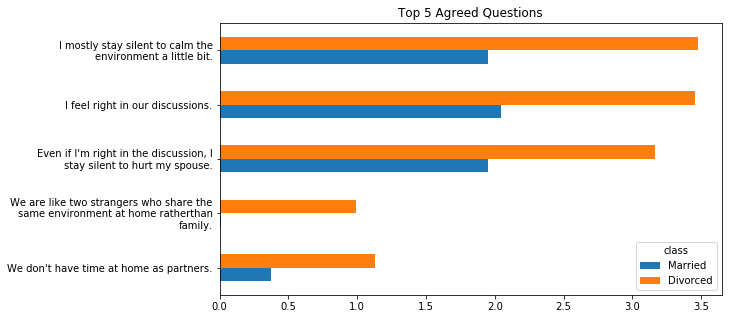

10:41: E231 missing whitespace after ','


In [472]:
figure = plt.gcf()
plt.rcParams['figure.figsize'] = 9, 5
agreed_df = df_mean_orig.sort_values(['difference'])[0:5]

agreed_df[['Married', 'Divorced']].plot(kind='barh')
agreed_questions = [value for key, value in quetions_list.items()
                    if key in agreed_df.index]
# plt.axhline(y=0,color='red')
plt.title("Top 5 Agreed Questions")
plt.savefig("Top 5 Agreed Questions.png",bbox_inches='tight', dpi=300)

<Figure size 648x360 with 0 Axes>

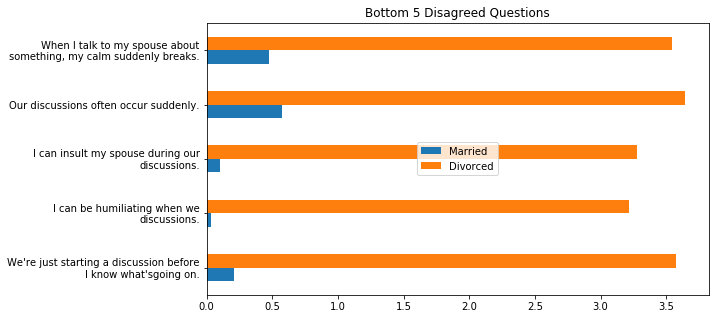

11:47: E231 missing whitespace after ','


In [473]:
figure = plt.gcf()
plt.rcParams['figure.figsize'] = 9, 5
agreed_df = df_mean_orig.sort_values(['difference'], ascending=False)[0:5]

agreed_df[['Married', 'Divorced']].plot(kind='barh')
agreed_questions = [value for key, value in quetions_list.items()
                    if key in agreed_df.index]
# plt.axhline(y=0,color='red')
plt.legend(loc='center')
plt.title("Bottom 5 Disagreed Questions")
plt.savefig("Bottom 5 Disagreed Questions.png",bbox_inches='tight', dpi=300)

**Conclusion:**
On average most agreed questions between happily married and divorced couples were 
    1. Starting a discussion before what's going on. 
    2. Humiliating during the discussion.
    3. Insulting partners during discussions.
    4. Discussion occurring suddenly.
    5. Breaking calm during the discussion with their wife.
In the top, five disagreed questions on average divorced couples mostly agreed and happily married couples disagreed.

On average most similar opinion topics between happily married and divorced couples were 
    1. They both don't have time with partners. 
    2. Acting like strangers who share the same family and environment.
    3. Staying silent during the discussion being right to hurt their spouse.
    4. Feeling right in their discussion.
    5. Most of the time staying silent to calm the environment.
Out of top similar opinion answered on average divorced couples most stayed silent during conversation, felt more right in their discussion, stayed more silent to hurt their spouse. On the other hand, happily married couples most disagreed with the opinion of sharing home and environment like strangers and not having time for partners.

## Question 3 <a class="anchor" id="q3"></a>
3. What couples needs to focus most in order to prevent divorce?

Here we'll use recursive feature elimination to select the features that can best predict a divorce. Selected features will be the most important thing couples need to focus in order to prevent divorce.

In [474]:
# seperate the data in X and Y
X = df.drop("class", axis=1)
y = df["class"].map({"Married": 0, "Divorced": 1})

In [475]:
# instantiate model
estimator = LinearSVC(random_state=1111)
# instaniate RFE
selector = RFE(estimator, 10, step=1)
# fit RFE
selector = selector.fit(X, y)
# print the results
print(selector.support_)
print(selector.ranking_)

[False False False False False  True False False False False False False
  True False False False False False  True  True False False False False
 False False False  True False  True False False False False False  True
 False False False  True False False  True False False False False  True
 False False False False False False]
[29 27 14 21 43  1 42 45 24 10  4 38  1 17 25 22  9 19  1  1 41 31 40 16
 37  5 26  1 15  1 35 33 34 20 44  1 23 36  6  1 28 30  1  8 18 12  7  1
  2 39  3 11 32 13]


In [476]:
len(selector.support_)

54

In [477]:
df.shape

(170, 55)

In [478]:
# select the data for top features
df_top = X.loc[:, selector.support_]
# top questions
top_questions = [value for key, value in quetions_list.items()
                 if key in df_top.columns]
# assign questions to column names
df_top.columns = top_questions
# add the class variable
df_top.loc[:, 'class'] = df['class']

/Users/mdranamahmud/anaconda3/envs/dspython3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mdranamahmud/anaconda3/envs/dspython3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [479]:
df_top.head()

,We don't have time at home as partners.,My spouse and I have similar sense of\nentertainment.,My spouse and I have similar ideas about\nhow roles should be in marriage,My spouse and I have similar values in\ntrust.,I know my spouse's hopes and wishes.,I know my spouse's friends and their\nsocial relationships.,I can be humiliating when we\ndiscussions.,We're just starting a discussion before\nI know what'sgoing on.,I mostly stay silent to calm the\nenvironment a little bit.,I feel right in our discussions.,class
0,0,1,0,1,0,1,1,3,1,3,Divorced
1,0,4,3,2,0,1,2,4,3,3,Divorced
2,3,2,3,2,2,2,1,3,2,3,Divorced
3,3,3,3,4,1,3,1,4,3,3,Divorced
4,1,0,2,1,2,1,0,1,3,2,Divorced


In [480]:
top_questions

["We don't have time at home as partners.",
 'My spouse and I have similar sense of\nentertainment.',
 'My spouse and I have similar ideas about\nhow roles should be in marriage',
 'My spouse and I have similar values in\ntrust.',
 "I know my spouse's hopes and wishes.",
 "I know my spouse's friends and their\nsocial relationships.",
 'I can be humiliating when we\ndiscussions.',
 "We're just starting a discussion before\nI know what'sgoing on.",
 'I mostly stay silent to calm the\nenvironment a little bit.',
 'I feel right in our discussions.']

In [481]:
# calculate mean
top_mean = df_top.groupby(['class']).mean()
# transpose data for plotting
top_mean = top_mean.T

<Figure size 648x360 with 0 Axes>

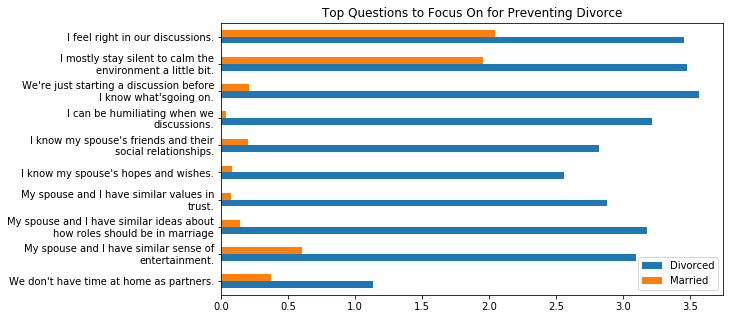

9:67: E231 missing whitespace after ','


In [482]:
figure = plt.gcf()
top_mean.plot(kind='barh')
# plt.axhline(y=0, color="gray")
# plt.axhline(y=1, color="gray")
# plt.axhline(y=-1, color="gray")
plt.title("Top Questions to Focus On for Preventing Divorce")
# plt.ylim(-2, 2)
plt.legend(loc='best')
plt.savefig("Top Questions to Focus On for Preventing Divorce.png",bbox_inches='tight', dpi=300)

From the above plots and important questions, we can say that they agree with our earlier questions. Divorced couples and happy couples were completely in opposite direction in terms of having a similar sense of entertainments, similar ideas about how roles should be in marriage, having similar values in trust, knowing spouses hopes and wishes, knowing spouses friends and social relationships, humiliating during discussions, starting a discussion before what's going wrong. Divorced couples mostly stayed silent to calm the environment, felt right in their discussions while happily married couples stayed almost neutral. In terms of time for partners at home, both agreed that they have time home as partners but divorced couples agree they had less time.

## Question 4 <a class="anchor" id="q4"></a>
4. How accuratley we can predict future divorce?

### Modeling <a class="anchor" id="modeling"></a>

In [483]:

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                    test_size=0.30,
                                                    random_state=1111)


In [484]:
# function to calculatel accuracy
def calculate_accuracy(model, X_train, y_train, X_test, y_test):
    """ Calculates model training and test accuracy

    Keyword arguments:
    model -- fitted sklearn model
    X_train -- Training features
    y_train -- Training labels
    X_test -- Test features
    y_test -- Test labels
    Return:
    A touple of train_accuracy, test_accuracy
    """
    predicted = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, predicted)
#     train_accuracy = round(train_accuracy, 2)
    predicted = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, predicted)
#     test_accuracy = round(test_accuracy,2)
    return (train_accuracy, test_accuracy)

In [485]:
# variable to store training,test accuracy
train_list = []
test_list = []

####  logistic regression model

In [486]:
# logistic regression model
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
train_accuracy, test_accuracy = calculate_accuracy(clf, X_train,
                                                   y_train, X_test, y_test)
print(train_accuracy)
print(test_accuracy)
# append the accuracy
train_list.append(train_accuracy)
test_list.append(test_accuracy)

0.9747899159663865
0.9803921568627451


#### Random Forest Classifier

In [487]:
# build randomforest model
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=2, stop=50, num=20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num=10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# do k fold cross validation

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, return_train_score=True,
                               refit=True, param_distributions=random_grid,
                               n_iter=100, cv=5,
                               verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

train_accuracy, test_accuracy = calculate_accuracy(rf_random, X_train,
                                                   y_train, X_test, y_test)
print(train_accuracy)
print(test_accuracy)
# append the accuracy
train_list.append(train_accuracy)
test_list.append(test_accuracy)

{'n_estimators': [2, 4, 7, 9, 12, 14, 17, 19, 22, 24, 27, 29, 32, 34, 37, 39, 42, 44, 47, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 485 out of 500 | elapsed:    7.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.5s finished


1.0
0.9803921568627451


#### K Nearest Neighbors

In [488]:
# create new a knn model
knn = KNeighborsClassifier()
# create parameter grid
param_grid = {"n_neighbors": np.arange(1, 20)}
# do grid serach
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# fit model
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [489]:
knn_cv.best_score_

0.9742753623188406

In [490]:
knn_cv.best_params_

{'n_neighbors': 1}

In [491]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [492]:
train_accuracy, test_accuracy = calculate_accuracy(knn_cv, X_train,
                                                   y_train, X_test, y_test)
print(train_accuracy)
print(test_accuracy)
# append the accuracy
train_list.append(train_accuracy)
test_list.append(test_accuracy)

1.0
0.9803921568627451


#### Automated Classifier using TPOT

In [493]:
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=20, population_size=10,
                          offspring_size=10, scoring="accuracy",
                          verbosity=2, random_state=42, cv=5)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

train_accuracy, test_accuracy = calculate_accuracy(tpot_clf, X_train,
                                                   y_train, X_test, y_test)
print(train_accuracy)
print(test_accuracy)
# append the accuracy
train_list.append(train_accuracy)
test_list.append(test_accuracy)


Generation 1 - Current best internal CV score: 0.9742753623188406
Generation 2 - Current best internal CV score: 0.9742753623188406
Generation 3 - Current best internal CV score: 0.9829710144927537
Generation 4 - Current best internal CV score: 0.9829710144927537
Generation 5 - Current best internal CV score: 0.9829710144927537
Generation 6 - Current best internal CV score: 0.9829710144927537
Generation 7 - Current best internal CV score: 0.9829710144927537
Generation 8 - Current best internal CV score: 0.9829710144927537
Generation 9 - Current best internal CV score: 0.9829710144927537
Generation 10 - Current best internal CV score: 0.9829710144927537
Generation 11 - Current best internal CV score: 0.9829710144927537
Generation 12 - Current best internal CV score: 0.9829710144927537
Generation 13 - Current best internal CV score: 0.9829710144927537
Generation 14 - Current best internal CV score: 0.9829710144927537
Generation 15 - Current best internal CV score: 0.9829710144927537
Gen

# Evaluation <a class="anchor" id="evaluation"></a>

In [494]:
# build a daaframe of the model accuracies
results = pd.DataFrame({"Machine Learning Algorithm":
    ["Logistic Regression", "Random Forest Classifier","K Nearest Classifier", "Automated Classifier TPOT"],
                        "Training": train_list, "Test": test_list})

3:5: E128 continuation line under-indented for visual indent
3:55: E231 missing whitespace after ','
3:80: E501 line too long (108 > 79 characters)


In [495]:
print(results)

  Machine Learning Algorithm  Training      Test
0        Logistic Regression  0.974790  0.980392
1   Random Forest Classifier  1.000000  0.980392
2       K Nearest Classifier  1.000000  0.980392
3  Automated Classifier TPOT  0.983193  0.960784


In [496]:
print(results)
# set index
results.set_index("Machine Learning Algorithm", inplace=True)

  Machine Learning Algorithm  Training      Test
0        Logistic Regression  0.974790  0.980392
1   Random Forest Classifier  1.000000  0.980392
2       K Nearest Classifier  1.000000  0.980392
3  Automated Classifier TPOT  0.983193  0.960784


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text xticklabel objects>)

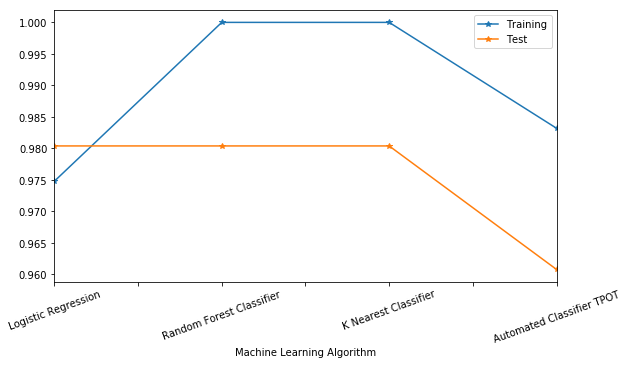

In [497]:
results.plot(style='*-')
plt.xticks(rotation=20)

<Figure size 648x360 with 0 Axes>

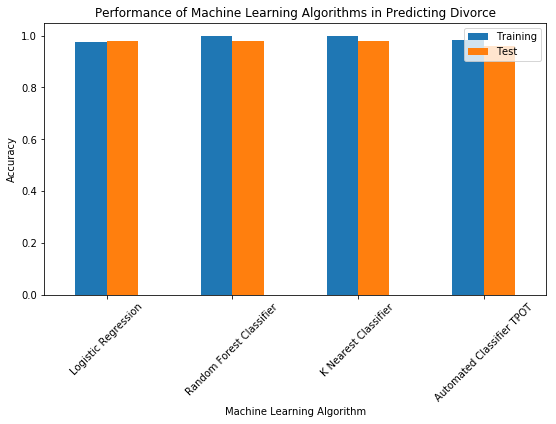

7:61: E231 missing whitespace after ','


In [498]:
figure = plt.gcf()
# plot the model results
results.plot(kind='bar')
plt.title("Performance of Machine Learning Algorithms in Predicting Divorce")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.savefig("Performance of Machine Learning Algorithms.png",bbox_inches='tight', dpi=300)

Using 70% data as training and 30% data as testing we've fitted here four models to find the best model. 
In logistic regression, I've used 5 fold cross-validation.
Random forest was optimized using a grid search and 5 fold cross-validation to find optimum model parameters.
For k equals 1 to 20 K nearest neighbor model was optimized with 5 fold cross-validation to select the best value of k.
Among the four fitted models, Random forest Classifier and K nearest neighbor shows overfitting while Automated Classifier TPOT shows underfitting. The logistic regression model seems to perform well and doesn't show overfitting and underfitting. It's also simple and explainable. So I would choose the Logistic Regression model as the best classifier for prediction divorce.

# Deployment <a class="anchor" id="deployment"></a>

## Summary of Analysis

Our conclusions are:
    1. There exists a significant difference between married and divorced couples in all the topics of the scale.
    
    2. Divorced and married couple's top 5 disagreed topics were discussion, humiliating during the discussion, insulting during the discussion, sudden discussion, breaking calm during the discussion. On the other hand, the top 5 most similar opinionated topics were having time at home for partners, acting like strangers in terms of sharing environment at home. Married couples agreed on average they have more time at home and act less like strangers about family and environment than divorced couples.
    The other two topics where married couples were neutral but divorced couples agreed that they mostly stayed silent and felt right in their discussion.
    Based on this we can say that married couples are more careful about their discussion, acts less like strangers in terms of sharing environment at home and gives more time to their partners.  
    
    3. Divorced couples and married couples top 10 deciding questions we can see divorced couples and married couples gave opposite answers. 
    
    4. Using 70% data as training and 30% data logistic regression model performs best and it can 98.03% accurately predict divorce between couples. 

# Reference

Yöntem, M.K. and İlhan, T. (2018). Boşanma Göstergeleri Ölçeğinin Geliştirilmesi.
[Development of the Divorce Predictors Scale]. Sosyal Polika Çalışmaları Dergisi.
41, 339-358.

Gottman, J. M. and Gottman, J.S. (2012). Çiftler Arasında Köprüyü İnşa Etmek:
Gottman Çift Terapisi Eğitimi 1. Düzey Kitabı, [Level 1 Clinical Training. Gottman
Method Couples Therapy. Bringing to Couple Chasm.] İstanbul: Psikoloji İstanbul.

Gottman, J. ve Silver, N. (2014). Aşk Nasıl Sürdürülür. Aşk Laboratuarından Sırlar.
(trans. Gül, S.S.) [What Make Love Last. How to Build Trust and Avoid Betrayal.
2012]. İstanbul: Varlık Yayınları.